In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv('./dataset_makers/original_data.csv')
df.replace("'",'', regex=True, inplace=True) 
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [3]:
df = df[df['gender'].isin(('M', 'F'))]
df['gender'] = df['gender'].map({'M':0, "F":1})
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,0,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,0,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,1,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,0,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,0,28007,M348934600,28007,es_transportation,35.72,0


In [4]:
df['age'] = df['age'].astype(int)

In [5]:
sum(df['fraud']), sum(df['fraud'])/len(df['fraud'])

(7193, 0.01213087106838688)

<AxesSubplot: >

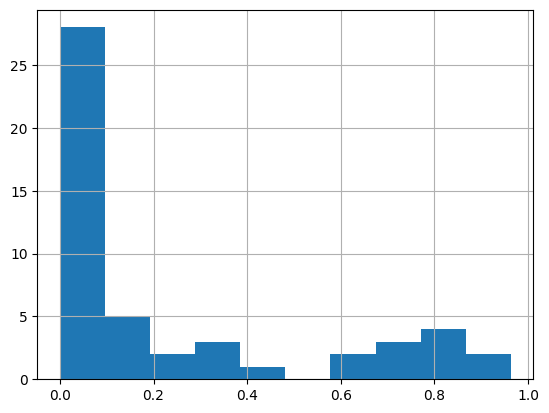

In [26]:
#fraud_per_merchant
fraud_rates = df.groupby('merchant').mean('fraud')['fraud']
c_merchant_fraud_rate = pd.cut(fraud_rates, 5, labels=False)
q_merchant_fraud_rate = pd.qcut(fraud_rates, 5, labels=False, duplicates='drop')
fraud_rates.hist()

<AxesSubplot: >

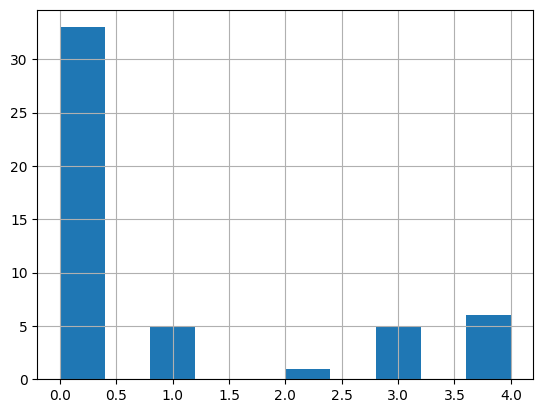

In [13]:
c_merchant_fraud_rate.hist()

<AxesSubplot: >

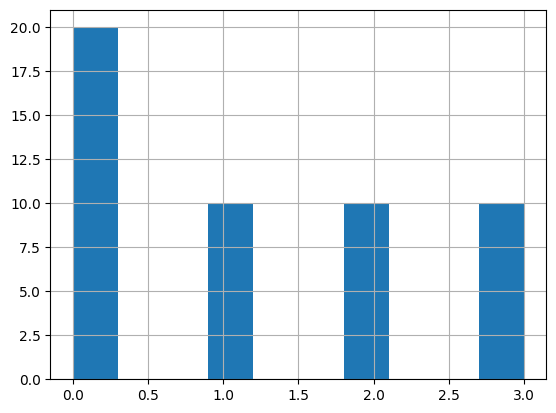

In [14]:
q_merchant_fraud_rate.hist()

In [15]:
mfr = c_merchant_fraud_rate
df['merchant fraud rate'] = df['merchant'].apply(lambda x: mfr.get(x))
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,merchant fraud rate
0,0,C1093826151,4,0,28007,M348934600,28007,es_transportation,4.55,0,0
1,0,C352968107,2,0,28007,M348934600,28007,es_transportation,39.68,0,0
2,0,C2054744914,4,1,28007,M1823072687,28007,es_transportation,26.89,0,0
3,0,C1760612790,3,0,28007,M348934600,28007,es_transportation,17.25,0,0
4,0,C757503768,5,0,28007,M348934600,28007,es_transportation,35.72,0,0


In [17]:
mfrq = q_merchant_fraud_rate
df['mfrq'] = df['merchant'].apply(lambda x: mfrq.get(x))
df['mfrq'].unique()

array([0, 1, 2, 3], dtype=int64)

<AxesSubplot: >

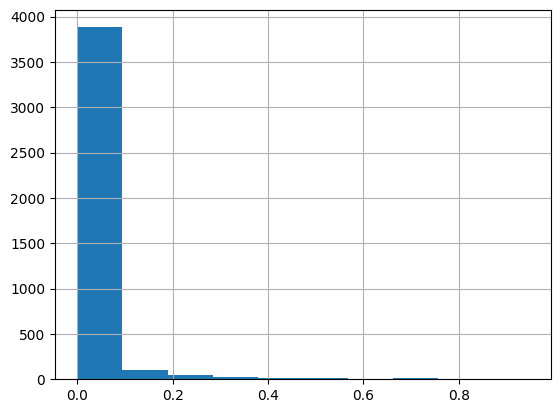

In [21]:
#fraud_per_customer
fraud_rates = df.groupby('customer').mean('fraud')
customer_fraud_rate = pd.cut(fraud_rates['fraud'], 5, labels=range(5))
df.groupby('customer').mean('fraud')['fraud'].hist()

In [20]:
df['customer previous fraud'] = df['customer'].apply(lambda x: customer_fraud_rate.get(x))
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,merchant fraud rate,customer previous fraud
0,0,C1093826151,4,0,28007,M348934600,28007,es_transportation,4.55,0,0,0
1,0,C352968107,2,0,28007,M348934600,28007,es_transportation,39.68,0,0,0
2,0,C2054744914,4,1,28007,M1823072687,28007,es_transportation,26.89,0,0,0
3,0,C1760612790,3,0,28007,M348934600,28007,es_transportation,17.25,0,0,0
4,0,C757503768,5,0,28007,M348934600,28007,es_transportation,35.72,0,0,0


array([[<AxesSubplot: title={'center': 'fraud'}>]], dtype=object)

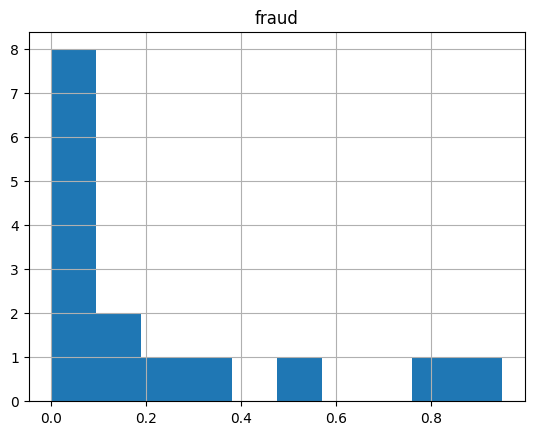

In [21]:
#fraud_per_category
categories = df.loc[:, ['category', 'fraud']]
cfr = categories.groupby('category').mean('fraud')
cfr_bins = pd.cut(cfr['fraud'], 5, labels=range(5))
categories.groupby('category').mean('fraud').hist()

In [22]:
cfr_dict = cfr_bins.to_dict()
df['category fraud rate'] = df['category'].apply(lambda x: cfr_dict.get(x))
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,merchant fraud rate,customer previous fraud,category fraud rate
0,0,C1093826151,4,0,28007,M348934600,28007,es_transportation,4.55,0,0,0,0
1,0,C352968107,2,0,28007,M348934600,28007,es_transportation,39.68,0,0,0,0
2,0,C2054744914,4,1,28007,M1823072687,28007,es_transportation,26.89,0,0,0,0
3,0,C1760612790,3,0,28007,M348934600,28007,es_transportation,17.25,0,0,0,0
4,0,C757503768,5,0,28007,M348934600,28007,es_transportation,35.72,0,0,0,0


In [23]:
numerical_df = df.drop(columns=['customer', 'zipcodeOri', 'zipMerchant', 'merchant', 'category'])
numerical_df.head()

,step,age,gender,amount,fraud,merchant fraud rate,customer previous fraud,category fraud rate
0,0,4,0,4.55,0,0,0,0
1,0,2,0,39.68,0,0,0,0
2,0,4,1,26.89,0,0,0,0
3,0,3,0,17.25,0,0,0,0
4,0,5,0,35.72,0,0,0,0


In [24]:
numerical_df = numerical_df[['amount', 'merchant fraud rate', 'customer previous fraud', 'category fraud rate', 'fraud']]

In [25]:
numerical_df.corr()

,amount,merchant fraud rate,customer previous fraud,category fraud rate,fraud
amount,1.000000,0.476539,0.231218,0.523425,0.489918
merchant fraud rate,0.476539,1.000000,0.381532,0.706017,0.720858
customer previous fraud,0.231218,0.381532,1.000000,0.262994,0.476929
category fraud rate,0.523425,0.706017,0.262994,1.000000,0.533839
fraud,0.489918,0.720858,0.476929,0.533839,1.000000


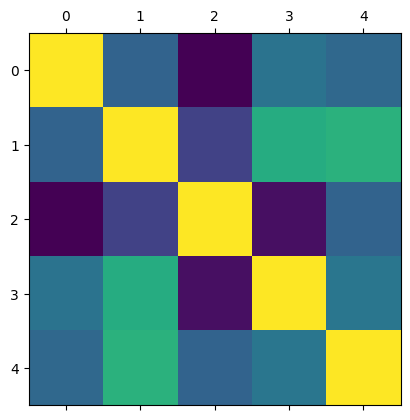

In [26]:
plt.matshow(numerical_df.corr())